#### Importing modules

In [55]:
import numpy as np
import matplotlib.pyplot as plt
import torch 
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

#### Loading the data from keras dataset

In [75]:
device = torch.device("mps")

In [80]:
# Setting up hyperparameter
input_size = 784  # 28x28
hidden_size = 100
num_classes = 10
num_epochs = 10
batch_size = 100
learning_rate = 0.001

In [62]:
# MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transforms.ToTensor(), download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transforms.ToTensor())

In [64]:
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=False)

In [67]:
examples = iter(train_loader)
samples, labels = next(examples)
print(samples.shape, labels.shape)

torch.Size([100, 1, 28, 28]) torch.Size([100])


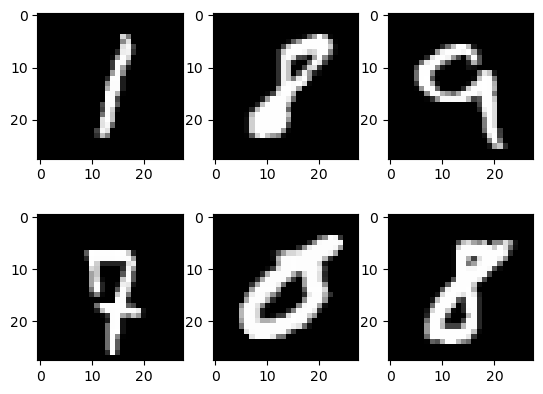

In [69]:
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.imshow(samples[i][0], cmap='gray')
plt.show()

In [92]:
class NeuralNet(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNet, self).__init__()
        self.l1 = nn.Linear(input_size, 256)
        self.relu = nn.ReLU()
        self.l2 = nn.Linear(256, 128)
        self.l3 = nn.Linear(128, 64)
        self.l4 = nn.Linear(64, 64)
        self.l5 = nn.Linear(64, 128)
        self.l6 = nn.Linear(128, num_classes)

    def forward(self, x):
        out = self.l1(x)
        out = self.relu(out)
        out = self.l2(out)
        out = self.relu(out)
        out = self.l3(out)
        out = self.relu(out)
        out = self.l4(out)
        out = self.relu(out)
        out = self.l5(out)
        out = self.relu(out)
        out = self.l6(out)
        return out

model = NeuralNet(input_size, hidden_size, num_classes)
model.to(mps_device)

NeuralNet(
  (l1): Linear(in_features=784, out_features=256, bias=True)
  (relu): ReLU()
  (l2): Linear(in_features=256, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=64, bias=True)
  (l4): Linear(in_features=64, out_features=64, bias=True)
  (l5): Linear(in_features=64, out_features=128, bias=True)
  (l6): Linear(in_features=128, out_features=10, bias=True)
)

In [90]:
# loss and optimiser

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [93]:
# training loop
n_total_steps = len(train_loader)
for epoch in range(num_epochs):
    for i, (images,labels) in enumerate(train_loader):
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)

        # forward
        outputs = model(images)
        loss = criterion(outputs, labels)

        # backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (i+1) % 100 == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{n_total_steps}, loss = {loss.item():.4f}')

epoch 1 / 10, step 100/600, loss = 2.3002
epoch 1 / 10, step 200/600, loss = 2.3023
epoch 1 / 10, step 300/600, loss = 2.2984
epoch 1 / 10, step 400/600, loss = 2.3001
epoch 1 / 10, step 500/600, loss = 2.2972
epoch 1 / 10, step 600/600, loss = 2.3067
epoch 2 / 10, step 100/600, loss = 2.3076
epoch 2 / 10, step 200/600, loss = 2.3053
epoch 2 / 10, step 300/600, loss = 2.3025
epoch 2 / 10, step 400/600, loss = 2.3060
epoch 2 / 10, step 500/600, loss = 2.3027
epoch 2 / 10, step 600/600, loss = 2.3011
epoch 3 / 10, step 100/600, loss = 2.3032
epoch 3 / 10, step 200/600, loss = 2.3013
epoch 3 / 10, step 300/600, loss = 2.3082
epoch 3 / 10, step 400/600, loss = 2.3047
epoch 3 / 10, step 500/600, loss = 2.3014
epoch 3 / 10, step 600/600, loss = 2.3024
epoch 4 / 10, step 100/600, loss = 2.3041
epoch 4 / 10, step 200/600, loss = 2.3029
epoch 4 / 10, step 300/600, loss = 2.2932
epoch 4 / 10, step 400/600, loss = 2.3063
epoch 4 / 10, step 500/600, loss = 2.3083
epoch 4 / 10, step 600/600, loss =

In [82]:
with torch.no_grad():
    n_correct = 0
    n_samples = 0
    for images, labels in test_loader:
        images = images.reshape(-1, 28*28).to(device)
        labels = labels.to(device)
        outputs = model(images)
        # max returns (value, index)
        _, predicted = torch.max(outputs.data, 1)
        n_samples += labels.size(0)
        n_correct += (predicted == labels).sum().item()

    acc = 100.0 * n_correct / n_samples
    print(f'accuracy = {acc}')

accuracy = 97.71
